In [3]:
# import relevant modules 
import os
import sys
from importlib import reload
import numpy as np
import matplotlib.pyplot as plt

# locate directory containing scripts 
current_directory = os.getcwd() 
parent_directory = os.path.dirname(current_directory)
src_directory = parent_directory + '/src'
sys.path.append(src_directory)

# import custom modules
import spin_chain
import generate_VTA_list
import fidelity_line_graphs

## reload custom modules (used when modifying scripts)
reload(spin_chain)
reload(generate_VTA_list)
reload(fidelity_line_graphs)

# import functions from modules
from spin_chain import symmetry_eigvecs, properties
from generate_VTA_list import SU2_automated
from fidelity_line_graphs import generate_initial_states, \
                                 plot_exact_fidelity, VTA_fidelity

$\Large \text{Collect Spin Chain Parameters}$

In [4]:
# specify parameters for spin chain (number of sites, coupling constants, 
# periodic or non-periodic boundary conditions,  and tolerance 
# with which to determine ground state energy
N_qubits = 4
Jx = 1
Jy = 1
Jz = 1
periodic_bc = True
tolerance = 1e-9

# collect properties of spin chain
H4, H4_list, eigenstates, eigenvalues, E0, ρ_ground_state = \
    properties(N_qubits, Jx, Jy, Jz, periodic_bc, tolerance)

# compute symmetry eigevectors 
# P, eigvecs, ρ_list = symmetry_eigvecs(N_qubits, Jx, Jy, Jz, periodic_bc)

# $\text{VTA}_{\text{exact}}(\alpha, \lambda, E_{\text{s}})$

$\Large \text{Measure M = 4 cavities}$

In [5]:
# define parameters for simulations
N_cavities = 4
N_qubits = 4
α_start = 0
α_end = 1
α_steps = 100
m_start = 4
m_stop = 4
Es = E0
num_states = 4
tolerance = 1e-9
cutoff = 'N/A'
savefile = True

# generates list of trial states to use for algorithm
Ψ0_list, ψ0_list = generate_initial_states(N_cavities, N_qubits, num_states, cutoff)

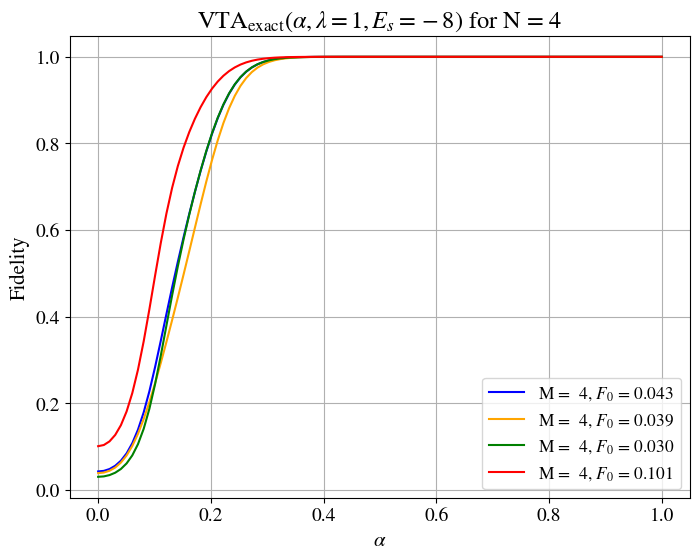

In [6]:
# plot simulation results
VTA_exact_fidelity_array = plot_exact_fidelity(
                           N_cavities, α_start, α_end, α_steps, Es, \
                           m_start, m_stop, N_qubits, Jx, Jy, Jz, \
                           periodic_bc, tolerance, ψ0_list, savefile, parent_directory)

$\Large \text{Measure } M = \{1, 2, 3, 4\} \text{ cavities}$

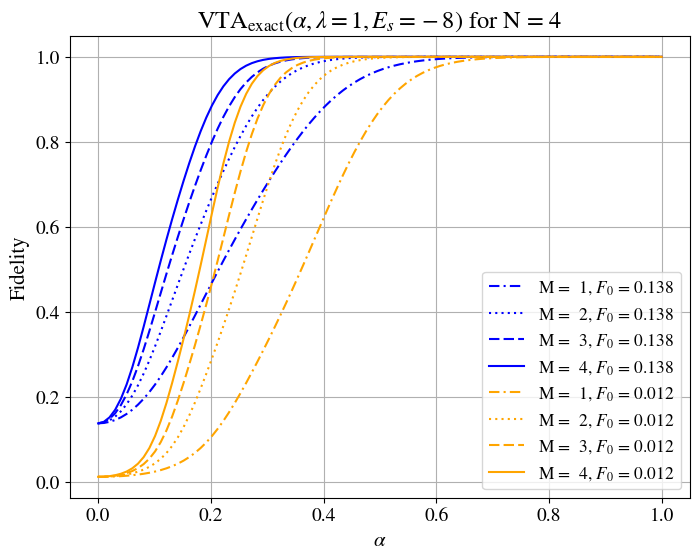

In [10]:
# adjust number of cavities to project and number of trial states
m_start = 1
m_end = 4
num_states = 2

# generates list of trial states to use for algorithm
Ψ0_list, ψ0_list = generate_initial_states(N_cavities, N_qubits, num_states, cutoff)

# plot simulation results
VTA_exact_fidelity_array = plot_exact_fidelity(
                           N_cavities, α_start, α_end, α_steps, Es, \
                           m_start, m_stop, N_qubits, Jx, Jy, Jz, \
                           periodic_bc, tolerance, ψ0_list, savefile, parent_directory)

# $\text{VTA}(\alpha, \lambda, E_{\text{s}})$

In [11]:
# adjust parameters for simulation
N_cavities = 4
N_qubits = 4
α_start = 0 
α_end = 1
α_steps = 1000
cutoff = 'N/A'
m_start = 4
m_end = 4
num_states = 4
r = 1
Es = -8
asymptotes = True
savefile = True
return_fidelity_array = True

# generate VTA list to use for algorithm 
VTA_list = SU2_automated(N_qubits, α_start, α_end, α_steps, \
                         Jx, Jy, Jz, Es, savefile, parent_directory)

# generates list of trial states to use for algorithm
Ψ0_list, ψ0_list = generate_initial_states(N_cavities, N_qubits, num_states, cutoff)

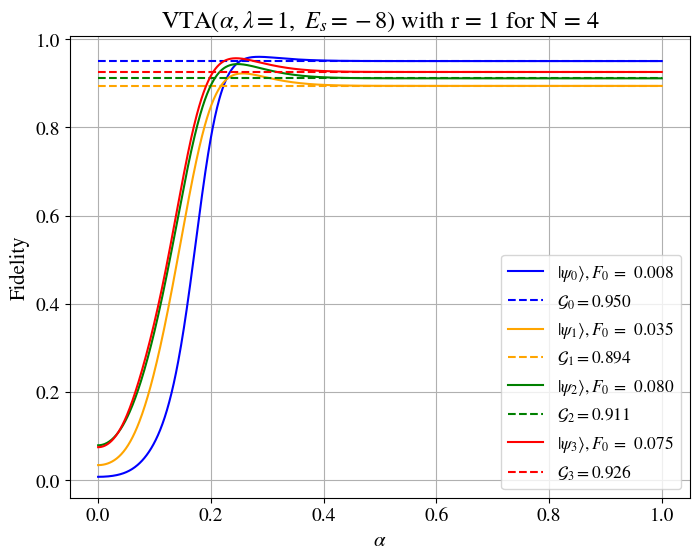

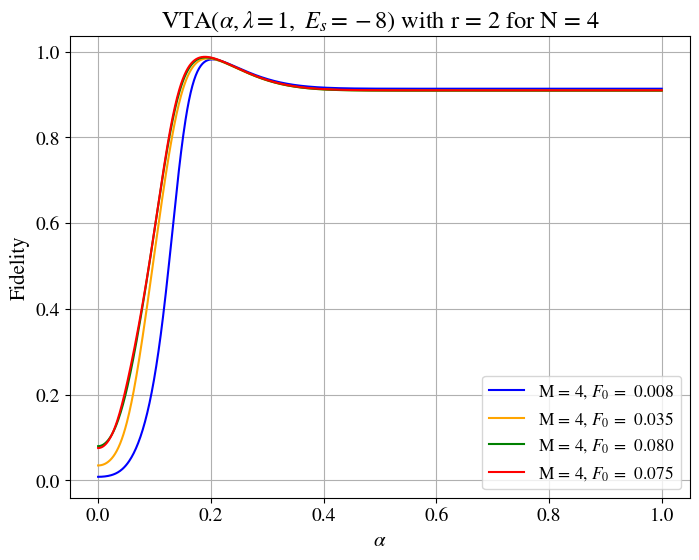

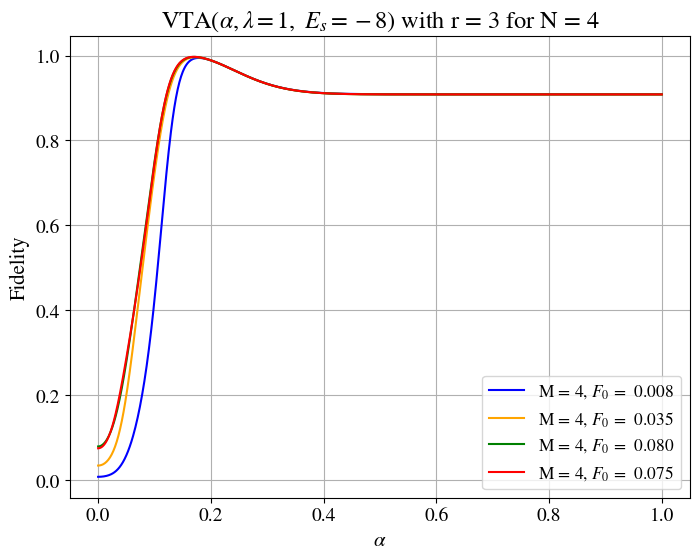

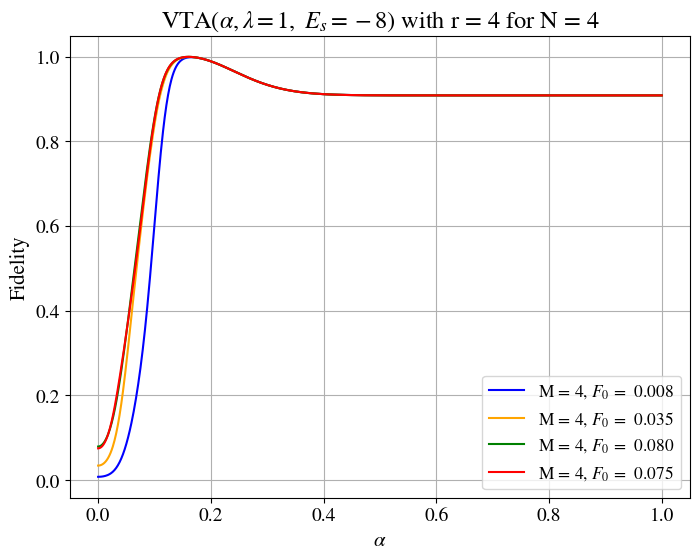

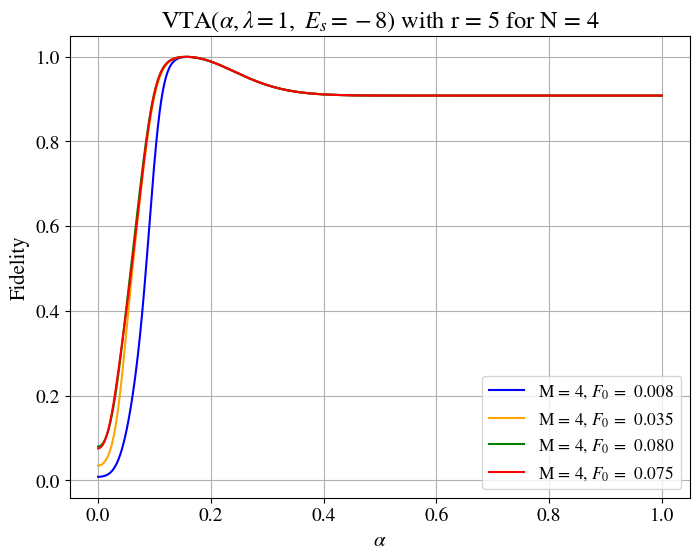

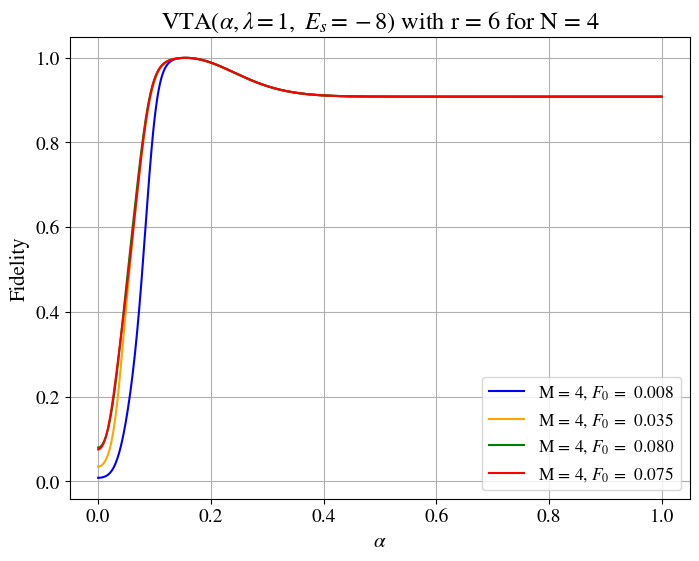

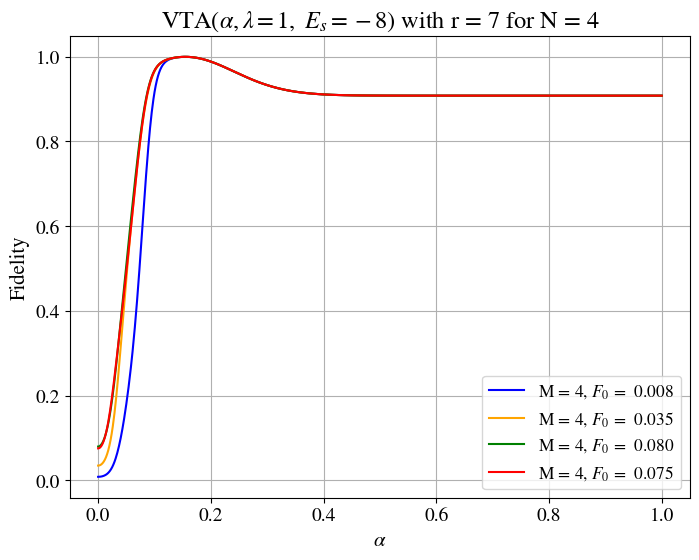

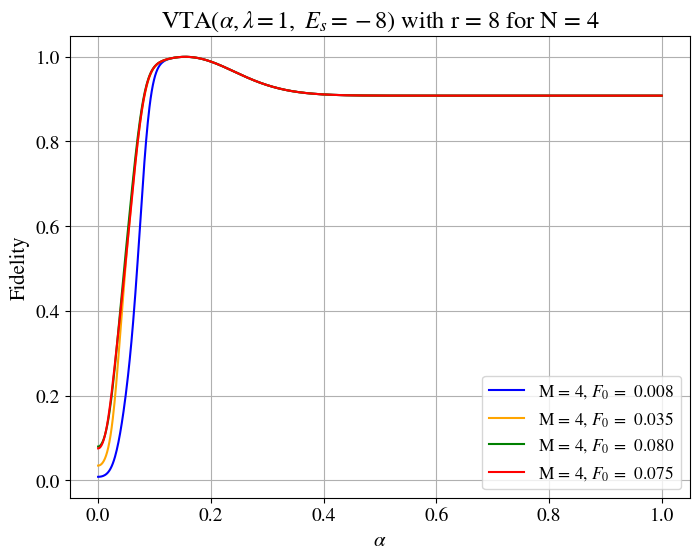

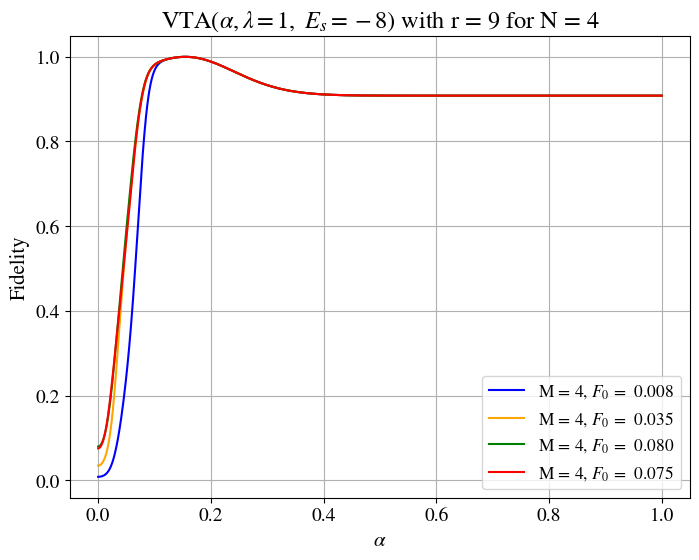

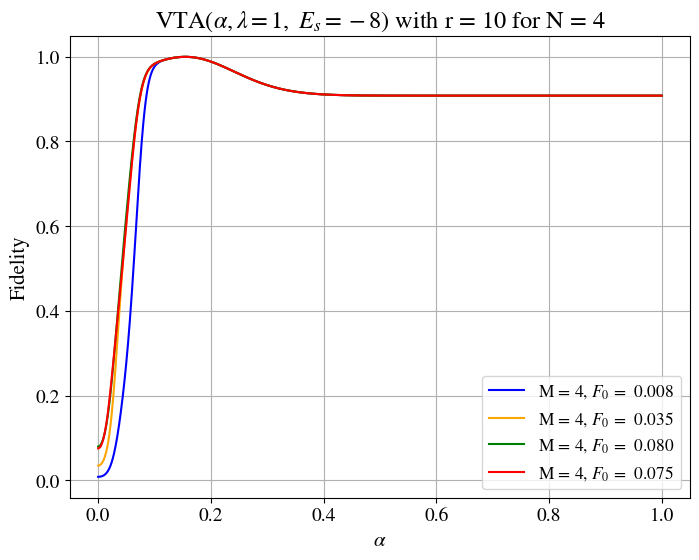

In [12]:
# iterate algorithm r times to observe convergence at optimal α
for r in range(1, 10+1):
    
    if r == 1: 
        asymptotes = True
    else: 
        asymptotes = False
    
    VTA_fidelity_array = VTA_fidelity(
                 N_qubits, ψ0_list, VTA_list, ρ_ground_state, α_start, α_end, α_steps, 
                 Jx, Jy, Jz, Es, r, m_start, m_end, asymptotes, savefile, \
                 parent_directory, return_fidelity_array = return_fidelity_array)

In [14]:
α_array = np.linspace(α_start, α_end, α_steps)
for i in range(num_states): 
    arg = np.argmax(VTA_fidelity_array[i])
    α_optimal = α_array[arg]
    print(f'Maximum fidelity for state {i} when α = {α_optimal:.4f}')

Maximum fidelity for state 0 when α = 0.1542
Maximum fidelity for state 1 when α = 0.1542
Maximum fidelity for state 2 when α = 0.1542
Maximum fidelity for state 3 when α = 0.1542


# $\text{Analysis of } \bf{G}$

In [15]:
# G(α, Es) basis functions
e0 = lambda α, Es: np.exp(-2*(α**2)*((Es + 12)**2)) 
e1 = lambda α, Es: np.exp(-2*(α**2)*((Es + 8)**2)) 
e2 = lambda α, Es: np.exp(-2*(α**2)*((Es + 4)**2)) 
e3 = lambda α, Es: np.exp(-2*(α**2)*(Es**2)) 
e4 = lambda α, Es: np.exp(-2*(α**2)*((Es - 4)**2))
e5 = lambda α, Es: np.exp(-2*(α**2)*((Es + 2)**2 + 4))
e6 = lambda α, Es: np.exp(-2*(α**2)*((Es + 2)**2 + 20))
e7 = lambda α, Es: np.exp(-2*(α**2)*(Es**2 + 8))
e8 = lambda α, Es: np.exp(-2*(α**2)*((Es + 4)**2 + 16))
e9 = lambda α, Es: np.exp(-2*(α**2)*(Es**2 + 16))
e10= lambda α, Es: np.exp(-2*(α**2)*((Es + 4)**2 + 32))

# G(α, Es) coefficients
g00 = lambda α, Es: (3*e0(α, Es) + 24*e1(α, Es) \
                     + 6*e2(α, Es) - e4(α, Es))/32
g44 = lambda α, Es: -(e0(α, Es) - 6*e2(α, Es) \
                      - 24*e3(α, Es) - 3*e4(α, Es))/32
g04 = lambda α, Es: (np.sqrt(3)*(e0(α, Es) + 4*e1(α, Es) - \
                     10*e2(α, Es) + 4*e3(α, Es) + e4(α, Es)))/32
g40 = lambda α, Es: - g04(α, Es)
gt = lambda α, Es: (e10(α, Es) + e2(α, Es) + 4*e5(α, Es) - 4*e6(α, Es) + \
                    2*e8(α, Es))/4
gs = lambda α, Es: (e3(α, Es) + e5(α, Es) - e6(α, Es) + e9(α, Es))/2
gq = lambda α, Es: e4(α, Es)

# compute G
def G(α, Es): 
    
    return g00(α, Es)*ρ_list[0] + \
           g04(α, Es)*eigvecs[0]*eigvecs[4].dag() + \
           g40(α, Es)*eigvecs[4]*eigvecs[0].dag() + \
           g44(α, Es)*ρ_list[4] + \
           gt(α, Es)*sum(ρ_list[1:4]) + \
           gs(α, Es)*sum(ρ_list[5:11]) + \
           gq(α, Es)*sum(ρ_list[11:16])
def find_arg(α_array, g_array):
    
    # find list of indices that rank order
    # moduli of terms in g_array
    arg_g_array = np.argsort(abs(g_array))
    
    # check for the first number that is larger 
    # than the number that follows
    for i in range(len(arg_g_array)): 
        if arg_g_array[i] > arg_g_array[i+1]: 
            
            optimal_indx = arg_g_array[i]
            # return α_array that minimizes
            # abs_g_array
            return α_array[optimal_indx]
def analyze_BG(α_start, α_end, α_steps, Es, asymptotes = False, \
               fontsize = 9, ncol = 2, loc = 'best'): 

    # construct arrays of the evolution of the entries of 
    # G over a sweep of α
    α_array = np.linspace(α_start, α_end, α_steps)
    g00_array = np.array([g00(α, Es) for α in α_array])
    g04_array = np.array([g04(α, Es) for α in α_array])
    g40_array = np.array([g40(α, Es) for α in α_array])
    g44_array = np.array([g44(α, Es) for α in α_array])

    # compute arrays of asymptotes
    g00_lim = g00_array[-1]
    g04_lim = g04_array[-1]
    g40_lim = g40_array[-1]
    g44_lim = g44_array[-1]

    # find the asymptotes of each entry
    g00_asym_array = np.tile(g00_lim, reps = α_steps)
    g04_asym_array = np.tile(g04_lim, reps = α_steps)
    g40_asym_array = np.tile(g40_lim, reps = α_steps)
    g44_asym_array = np.tile(g44_lim, reps = α_steps)
    
    # compute labels of g00 and g44
    g00_label = fr'$ \lim_{{\alpha \to \infty}} g_{{00}} = {round(g00_lim, 3)}$'
    g44_label = fr'$ \lim_{{\alpha \to \infty}} g_{{44}} = {round(g44_lim, 3)}$'

    # compute labels of g04 and g40
    if np.allclose(g04_lim, np.sqrt(3)/8, atol = 1e-9):
        g04_label = r'$\lim_{{\alpha \to \infty}} g_{{00}} = \frac{\sqrt{3}}{8}$'
    else: 
        g04_label = fr'$\lim_{{\alpha \to \infty}} g_{{04}} = {round(g04_lim, 3)}$'

    if np.allclose(g40_lim, -np.sqrt(3)/8, atol = 1e-9):
        g40_label = r'$\lim_{{\alpha \to \infty}} g_{{40}} = -\frac{\sqrt{3}}{8}$'
    else: 
        g40_label = fr'$\lim_{{\alpha \to \infty}} g_{{00}} = {round(g40_lim, 3)}$'
        
    # find α that minimzes abs(g04_array)
    α_optimal = find_arg(α_array, g04_array)

    fig, ax = plt.subplots(figsize=(8, 6))
    ax.plot(α_array, g00_array, color = 'green', label = r'$g_{00}$')
    ax.plot(α_array, g04_array, color = 'red', label = r'$ g_{04}$')
    ax.plot(α_array, g40_array, color = 'orange', label = r'$g_{40}$')
    ax.plot(α_array, g44_array, color = 'blue', label = r'$g_{44}$')
    
    if asymptotes: 
        
        # compute labels of g00, g04 and g40
        if np.allclose(g00_lim, 3/4, atol = 1e-9):
            g00_label = r'$\lim_{{\alpha \to \infty}} g_{{00}} = \frac{3}{4}$'
        else: 
            g00_label = fr'$\lim_{{\alpha \to \infty}} g_{{04}} = {round(g00_lim, 3)}$'
        
        if np.allclose(g04_lim, np.sqrt(3)/8, atol = 1e-9):
            g04_label = r'$\lim_{{\alpha \to \infty}} g_{{04}} = \frac{\sqrt{3}}{8}$'
        else: 
            g04_label = fr'$\lim_{{\alpha \to \infty}} g_{{04}} = {round(g04_lim, 3)}$'

        if np.allclose(g40_lim, -np.sqrt(3)/8, atol = 1e-9):
            g40_label = r'$\lim_{{\alpha \to \infty}} g_{{40}} = -\frac{\sqrt{3}}{8}$'
        else: 
            g40_label = fr'$\lim_{{\alpha \to \infty}} g_{{40}} = {round(g40_lim, 3)}$'
    
        ax.plot(α_array, g00_asym_array, color = 'green', \
                linestyle = '--', label = g00_label)

        ax.plot(α_array, g04_asym_array, color = 'red', \
                linestyle = '--', label = g04_label)

        ax.plot(α_array, g40_asym_array, color = 'orange', \
                linestyle = '--', label = g40_label)

        ax.plot(α_array, g44_asym_array, color = 'blue', \
                linestyle = '--', label = g44_label)

    ax.set_xlabel(r'$\alpha$', fontsize = 15)
    ax.set_title(fr'Entries of $\bf{{G}}$ for $E_s = {Es}$', fontsize=17.5)
    ax.legend(fontsize = fontsize, ncol = ncol, loc = loc)
    ax.grid()
    
    # find α that minimzes abs(g04_array)
    α_optimal = find_arg(α_array, g04_array)
    return α_optimal   

Off-diagonal entries go to 0 when α = 0.1542


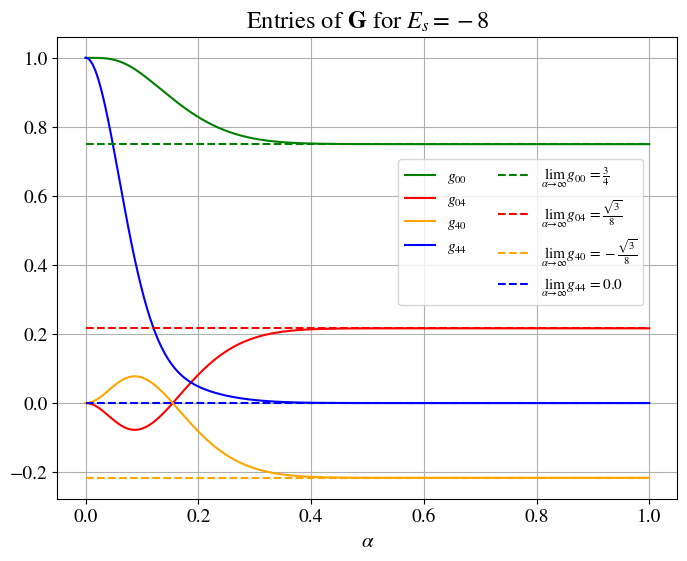

In [16]:
asymptotes = True
fontsize = 11
ncol = 2
loc = (0.55, 0.42)
α_magic = analyze_BG(α_start, α_end, α_steps, Es,\
                       asymptotes = asymptotes, \
                       fontsize = fontsize,  \
                       ncol = ncol, loc = loc)
print(f'Off-diagonal entries go to 0 when α = {α_magic:.4f}')